In [8]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트, 마이너스 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(train_input,train_target),(test_input,test_target) = load_data()

In [4]:
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
def show_images(dataset,label,nrow,ncol):

    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols= ncol, figsize=(2*ncol,2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):

        image = dataset[i]
        ax[i].imshow(image,cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()

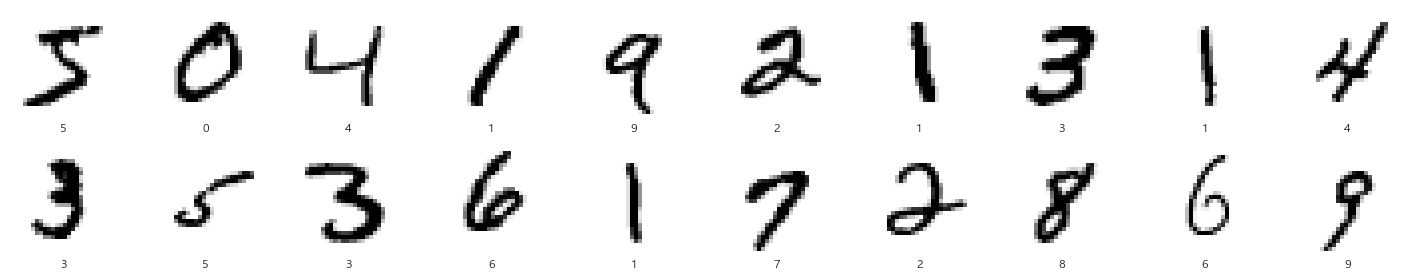

In [10]:
show_images(train_input,train_target,2,10)

In [12]:
model = keras.Sequential(name='ANN')

model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력 값을 1차원으로
model.add(keras.layers.Dense(100,activation='relu',name='hidden'))
model.add(keras.layers.Dense(10,activation='softmax',name='output'))
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 255.0 나눠서 0~1로 값 축소하는 일은 안함
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ANN_model.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20,verbose=1,batch_size=100, validation_data=(test_input, test_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
598/600 [============================>.] - ETA: 0s - loss: 4.5030 - accuracy: 0.8614
Epoch 1: val_loss improved from inf to 1.06018, saving model to ./data\best_ANN_model.h5
600/600 [==============================] - 2s 2ms/step - loss: 4.4903 - accuracy: 0.8615 - val_loss: 1.0602 - val_accuracy: 0.8817
Epoch 2/20
581/600 [============================>.] - ETA: 0s - loss: 0.6852 - accuracy: 0.9033
Epoch 2: val_loss improved from 1.06018 to 0.57858, saving model to ./data\best_ANN_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.9035 - val_loss: 0.5786 - val_accuracy: 0.9080
Epoch 3/20
576/600 [===========================>..] - ETA: 0s - loss: 0.3850 - accuracy: 0.9231
Epoch 3: val_loss improved from 0.57858 to 0.46673, saving model to ./data\best_ANN_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.9234 - val_loss: 0.4667 - val_accuracy: 0.9128
Epoch 4/20
577/600 [========================

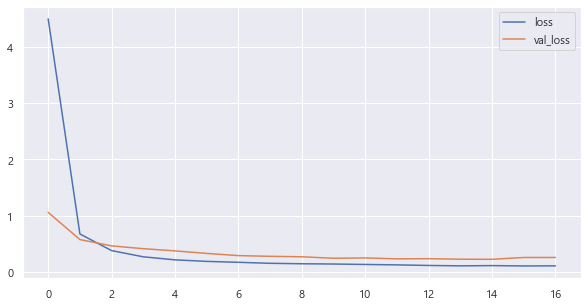

In [16]:
plot_target = ['loss','val_loss']
plt.figure(figsize=(10,5))


for each in plot_target:
    plt.plot(history.history[each],label=each)
plt.legend()
plt.show()

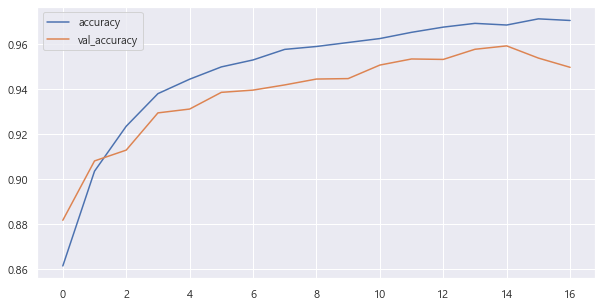

In [19]:
plot_target = ['accuracy','val_accuracy']
plt.figure(figsize=(10,5))


for each in plot_target:
    plt.plot(history.history[each],label=each)
plt.legend()
plt.show()

In [20]:
model.evaluate(test_input,test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9590


[0.2287227064371109, 0.9589999914169312]

In [21]:
pred_result = model.predict(test_input)

313/313 [==============================] - 0s 1ms/step


In [23]:
pred_labels = np.argmax(pred_result,axis=-1)
pred_labels[:10]
pred_labels.shape

(10000,)

##### 예측실패한 이미지 파악

In [24]:
worng_result = []

for i in range(0,len(test_target)):
    if pred_labels[i] != test_target[i]:
        worng_result.append(i)

len(worng_result)

410

In [27]:
import random

sample = random.choices(population=worng_result,k=16)
sample

[1226,
 8519,
 1553,
 2371,
 6625,
 6091,
 4017,
 1119,
 9662,
 1415,
 4505,
 2939,
 2462,
 1325,
 6030,
 1952]

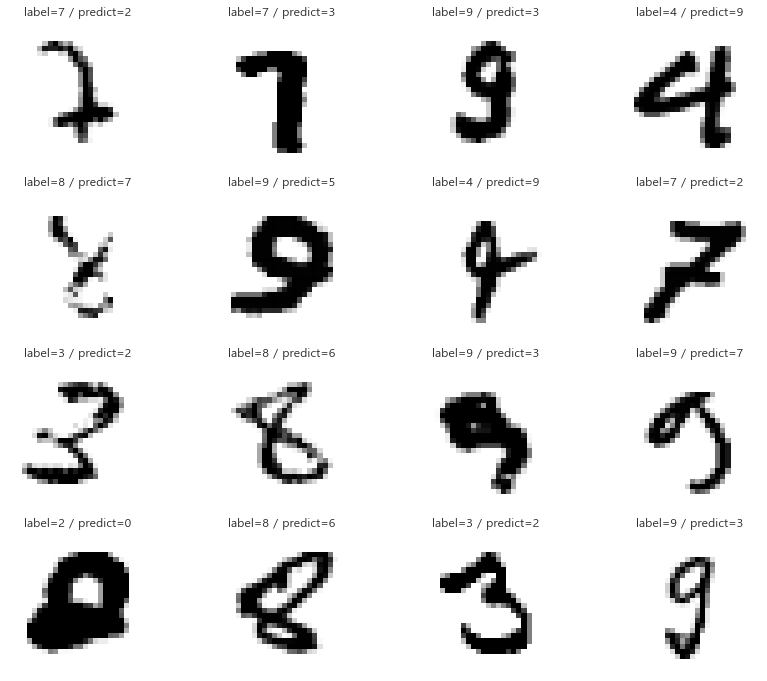

In [30]:
# 예측실패한 이미지 확인

plt.figure(figsize=(14,12))
for idx,n in enumerate(sample):
    plt.subplot(4,4,idx+1)
    plt.imshow(test_input[n].reshape(28,28),cmap='gray_r',interpolation='nearest')
    plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
    plt.axis('off')

plt.show()

#### Dropout 안한 것이 더 잘 나옴

In [31]:
model = keras.Sequential(name='ANN')

model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력 값을 1차원으로
model.add(keras.layers.Dense(100,activation='relu',name='hidden'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax',name='output'))
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ANN_model.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20,verbose=1,batch_size=100, validation_data=(test_input, test_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
589/600 [============================>.] - ETA: 0s - loss: 4.5610 - accuracy: 0.6522
Epoch 1: val_loss improved from inf to 0.81241, saving model to ./data\best_ANN_model.h5
600/600 [==============================] - 2s 3ms/step - loss: 4.4983 - accuracy: 0.6525 - val_loss: 0.8124 - val_accuracy: 0.8078
Epoch 2/20
586/600 [============================>.] - ETA: 0s - loss: 0.8780 - accuracy: 0.7699
Epoch 2: val_loss improved from 0.81241 to 0.57257, saving model to ./data\best_ANN_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.8756 - accuracy: 0.7704 - val_loss: 0.5726 - val_accuracy: 0.8782
Epoch 3/20
590/600 [============================>.] - ETA: 0s - loss: 0.6657 - accuracy: 0.8243
Epoch 3: val_loss improved from 0.57257 to 0.45672, saving model to ./data\best_ANN_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.6643 - accuracy: 0.8248 - val_loss: 0.4567 - val_accuracy: 0.9075
Epoch 4/20
577/600 [========================

In [33]:
model.evaluate(test_input,test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.2206 - accuracy: 0.9538


[0.22060465812683105, 0.9538000226020813]